Mock dataset created with 5000 samples
Chronic disease prevalence:
  diabetes: 32.9%
  heart_disease: 22.8%
  copd: 25.1%
  arthritis: 27.4%
  depression: 32.5%
Healthcare access: 45.2%

RQ1: PREDICTIVE ANALYTICS VISUALIZATIONS


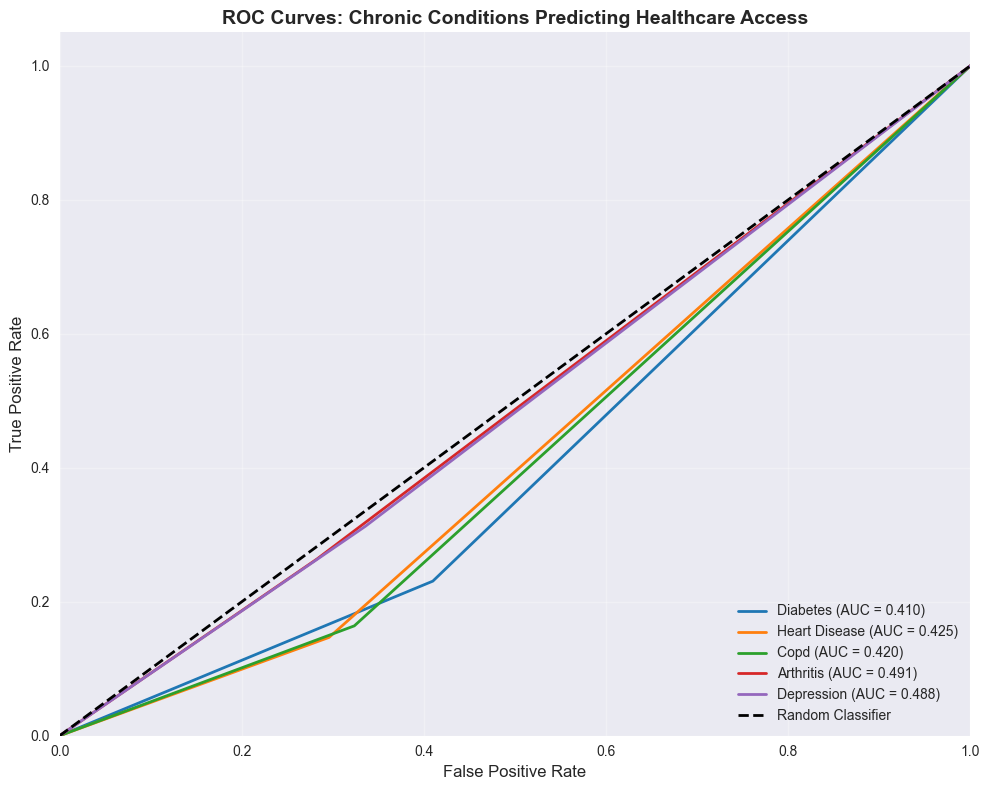

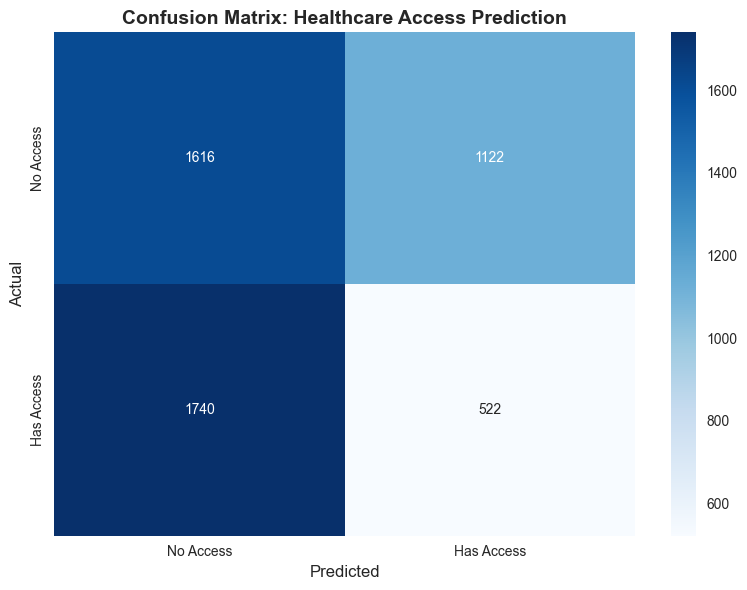

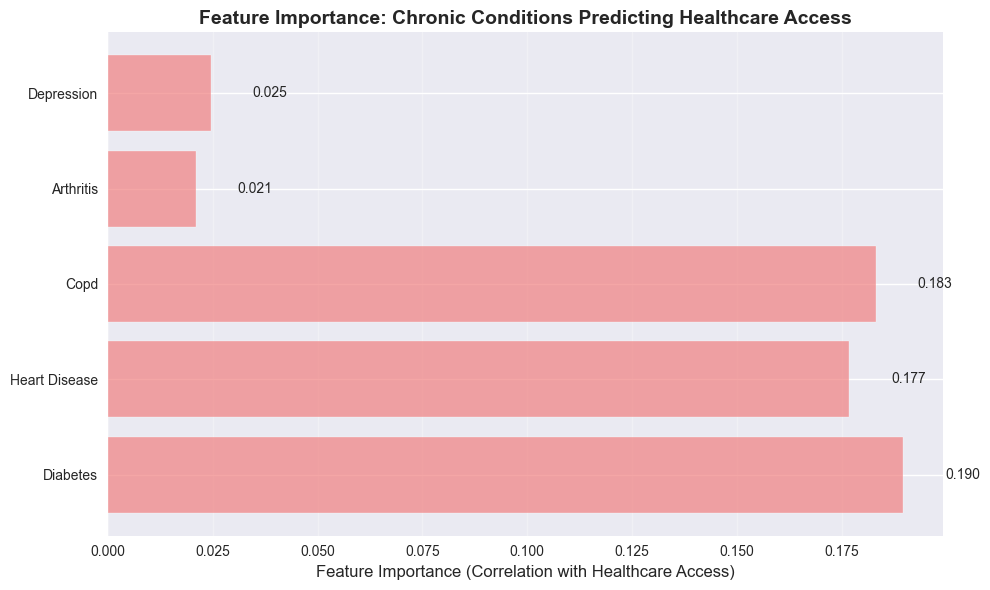


RQ2: DEMOGRAPHIC CLUSTERING VISUALIZATIONS


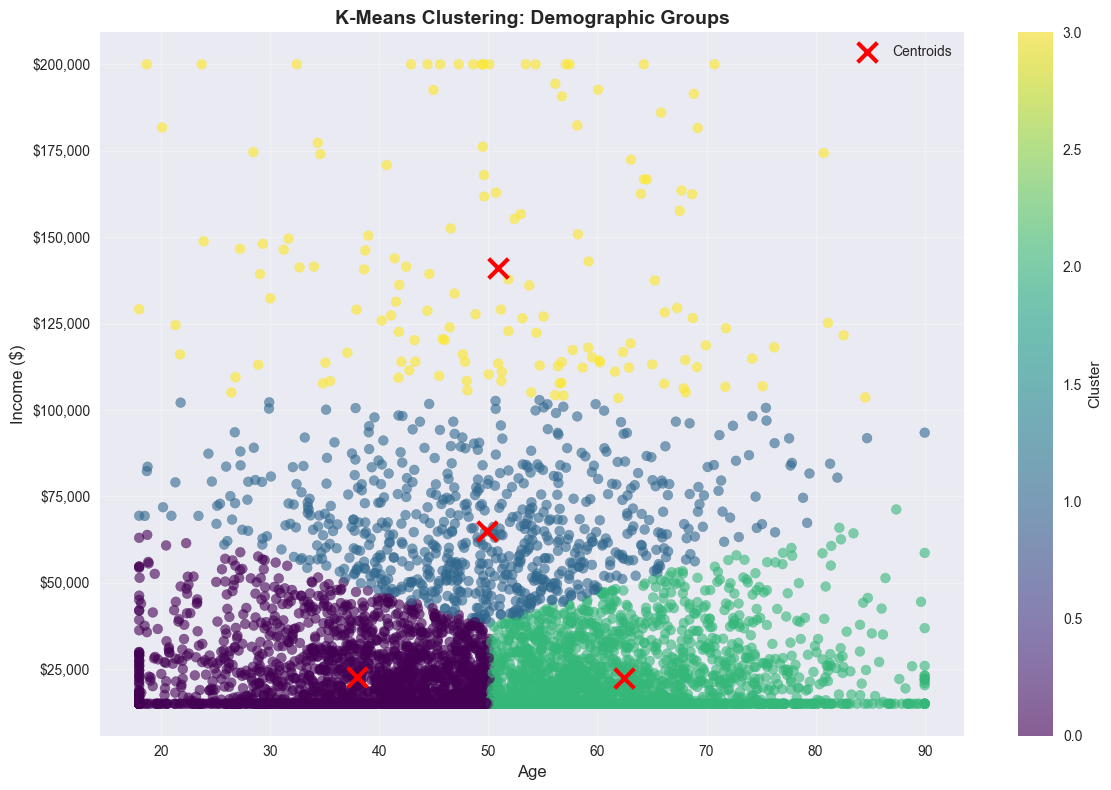

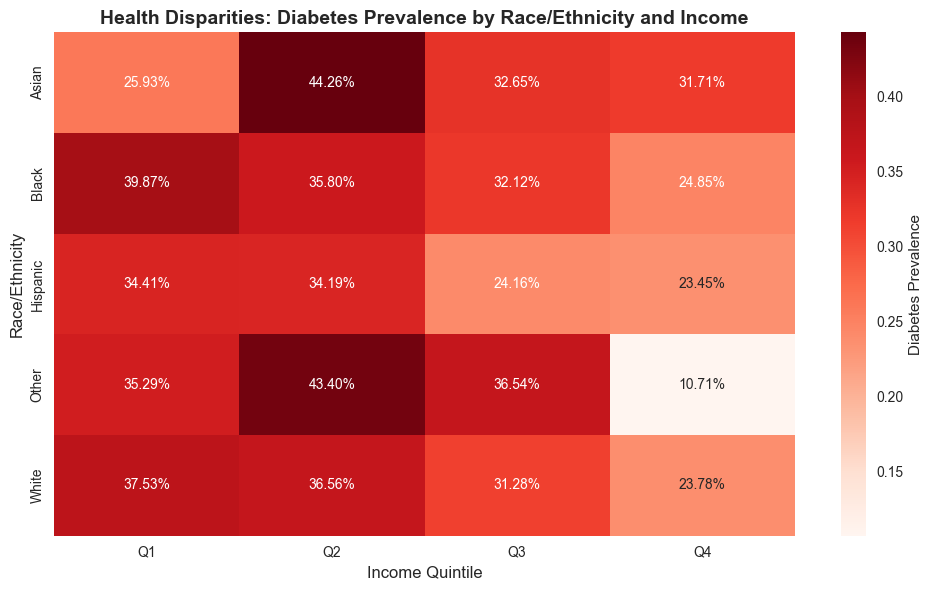


RQ3: UNSUPERVISED LEARNING VISUALIZATIONS


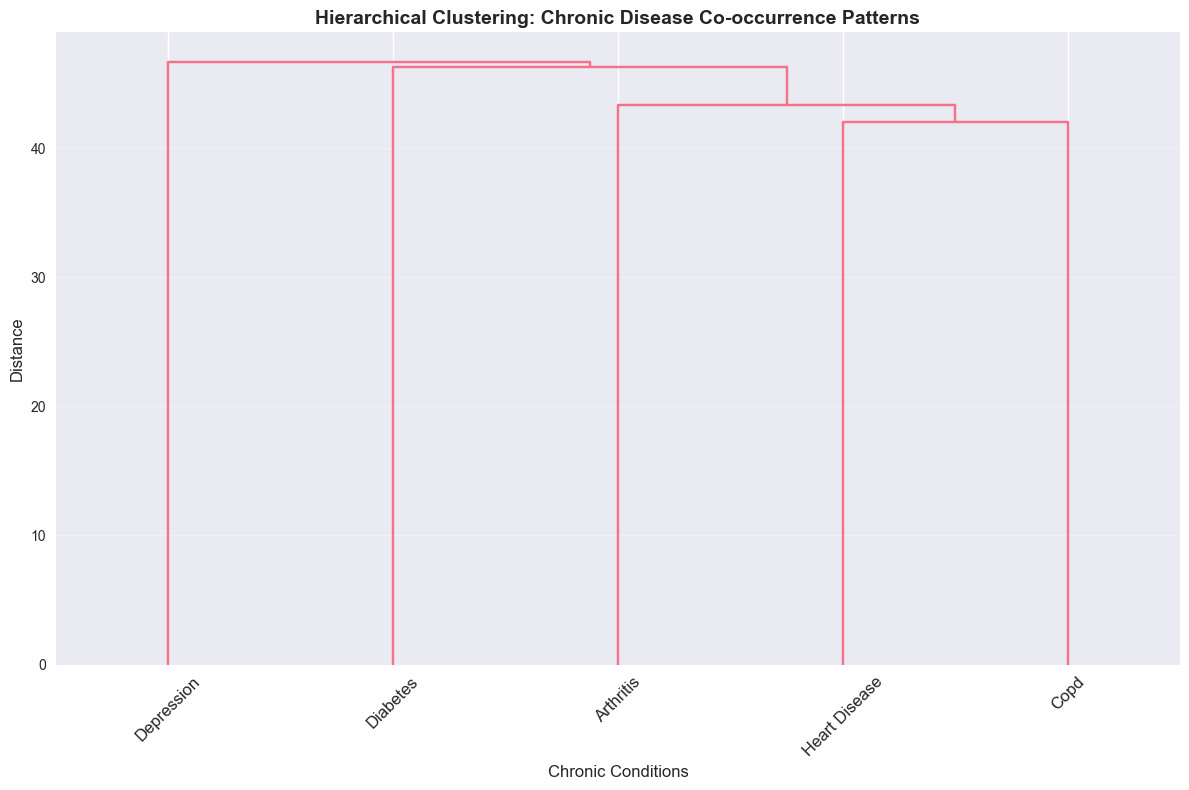


VISUALIZATION TOOLKIT SUMMARY

📊 RECOMMENDED PYTHON LIBRARIES:
  • Plotly: Interactive plots, dashboards, maps
  • Seaborn: Statistical plots, heatmaps, correlation matrices
  • Matplotlib: Foundation plots, publication-quality figures
  • Scikit-learn: ML metrics, clustering, model evaluation

🎯 KEY VISUALIZATIONS IMPLEMENTED:
  1. ROC Curves - Model performance comparison
  2. Confusion Matrix - Prediction accuracy assessment
  3. Feature Importance - Variable ranking
  4. K-Means Clustering - Demographic pattern discovery
  5. Health Disparities Heatmap - Equity analysis
  6. Parallel Coordinates - Multi-dimensional exploration
  7. Dendrogram - Disease co-occurrence patterns
  8. Choropleth Map - Geographic health patterns
  9. Interactive Dashboard - Integrated analysis

💡 NEXT STEPS:
  • Customize color schemes for accessibility
  • Add interactivity with Plotly widgets
  • Export high-quality figures for presentations
  • Deploy dashboard using Streamlit or Dash

🔗 USEFUL RESOU

In [3]:
# CDC-BRFSS Chronic Health Conditions Visualization Examples
# Install required packages:
# pip install plotly seaborn matplotlib scikit-learn pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ============================================================================
# MOCK DATA GENERATION (Simulating CDC-BRFSS data)
# ============================================================================

np.random.seed(42)
n_samples = 5000

# Create mock CDC-BRFSS dataset
mock_data = pd.DataFrame({
    'age': np.random.normal(50, 15, n_samples).clip(18, 90),
    'income': np.random.lognormal(10, 0.8, n_samples).clip(15000, 200000),
    'education': np.random.choice(['High School', 'Some College', 'Bachelor+'], n_samples, p=[0.3, 0.4, 0.3]),
    'race_ethnicity': np.random.choice(['White', 'Black', 'Hispanic', 'Asian', 'Other'], n_samples, p=[0.6, 0.15, 0.15, 0.05, 0.05]),
    'state': np.random.choice(['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI'], n_samples),
    'urban_rural': np.random.choice(['Urban', 'Rural'], n_samples, p=[0.8, 0.2]),
})

# Generate chronic conditions (correlated with age and income)
age_factor = (mock_data['age'] - 30) / 60
income_factor = 1 - (np.log(mock_data['income']) - 9) / 3

mock_data['diabetes'] = (np.random.random(n_samples) < (0.1 + 0.3 * age_factor + 0.2 * income_factor)).astype(int)
mock_data['heart_disease'] = (np.random.random(n_samples) < (0.05 + 0.25 * age_factor + 0.15 * income_factor)).astype(int)
mock_data['copd'] = (np.random.random(n_samples) < (0.03 + 0.2 * age_factor + 0.25 * income_factor)).astype(int)
mock_data['arthritis'] = (np.random.random(n_samples) < (0.08 + 0.4 * age_factor + 0.1 * income_factor)).astype(int)
mock_data['depression'] = (np.random.random(n_samples) < (0.12 + 0.1 * age_factor + 0.3 * income_factor)).astype(int)

# Healthcare access (inversely correlated with chronic conditions and income)
healthcare_access_prob = 0.8 - 0.3 * income_factor - 0.2 * (mock_data['diabetes'] + mock_data['heart_disease'] + mock_data['copd'])
mock_data['healthcare_access'] = (np.random.random(n_samples) < healthcare_access_prob.clip(0.1, 0.95)).astype(int)

print(f"Mock dataset created with {len(mock_data)} samples")
print(f"Chronic disease prevalence:")
for condition in ['diabetes', 'heart_disease', 'copd', 'arthritis', 'depression']:
    print(f"  {condition}: {mock_data[condition].mean():.1%}")
print(f"Healthcare access: {mock_data['healthcare_access'].mean():.1%}")

# ============================================================================
# RQ1: PREDICTIVE ANALYTICS VISUALIZATIONS
# ============================================================================

print("\n" + "="*50)
print("RQ1: PREDICTIVE ANALYTICS VISUALIZATIONS")
print("="*50)

# 1. ROC Curves for Multiple Chronic Conditions
def plot_roc_curves():
    """Create ROC curves comparing chronic conditions predicting healthcare access"""

    conditions = ['diabetes', 'heart_disease', 'copd', 'arthritis', 'depression']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    plt.figure(figsize=(10, 8))

    for i, condition in enumerate(conditions):
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(mock_data['healthcare_access'], mock_data[condition])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color=colors[i], lw=2,
                 label=f'{condition.replace("_", " ").title()} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curves: Chronic Conditions Predicting Healthcare Access', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt

plot_roc_curves()
plt.show()

# 2. Confusion Matrix Heatmap
def plot_confusion_matrix():
    """Create confusion matrix for healthcare access prediction"""

    # Use diabetes as primary predictor (simplified prediction)
    y_true = mock_data['healthcare_access']
    y_pred = mock_data['diabetes']  # Simplified prediction

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Access', 'Has Access'],
                yticklabels=['No Access', 'Has Access'])
    plt.title('Confusion Matrix: Healthcare Access Prediction', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    return plt

plot_confusion_matrix()
plt.show()

# 3. Feature Importance Plot
def plot_feature_importance():
    """Create feature importance plot for chronic conditions"""

    conditions = ['diabetes', 'heart_disease', 'copd', 'arthritis', 'depression']

    # Calculate correlation with healthcare access (simplified importance)
    importance_scores = []
    for condition in conditions:
        corr = abs(mock_data[condition].corr(mock_data['healthcare_access']))
        importance_scores.append(corr)

    # Create horizontal bar plot
    plt.figure(figsize=(10, 6))
    y_pos = np.arange(len(conditions))

    bars = plt.barh(y_pos, importance_scores, color='lightcoral', alpha=0.7)
    plt.yticks(y_pos, [c.replace('_', ' ').title() for c in conditions])
    plt.xlabel('Feature Importance (Correlation with Healthcare Access)', fontsize=12)
    plt.title('Feature Importance: Chronic Conditions Predicting Healthcare Access', fontsize=14, fontweight='bold')

    # Add value labels on bars
    for i, (bar, score) in enumerate(zip(bars, importance_scores)):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                 f'{score:.3f}', va='center', fontsize=10)

    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    return plt

plot_feature_importance()
plt.show()

# ============================================================================
# RQ2: DEMOGRAPHIC CLUSTERING VISUALIZATIONS
# ============================================================================

print("\n" + "="*50)
print("RQ2: DEMOGRAPHIC CLUSTERING VISUALIZATIONS")
print("="*50)

# 4. K-Means Clustering Scatter Plot
def plot_kmeans_clusters():
    """Create K-means clustering visualization with demographic data"""

    # Prepare data for clustering
    cluster_features = ['age', 'income']
    X = mock_data[cluster_features].copy()

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform K-means clustering
    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Create scatter plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(mock_data['age'], mock_data['income'],
                          c=clusters, cmap='viridis', alpha=0.6, s=50)

    # Add cluster centers
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1],
                c='red', marker='x', s=200, linewidths=3, label='Centroids')

    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Income ($)', fontsize=12)
    plt.title('K-Means Clustering: Demographic Groups', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, label='Cluster')
    plt.legend()

    # Format y-axis for income
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt

plot_kmeans_clusters()
plt.show()

# 5. Health Disparities Heatmap
def plot_health_disparities():
    """Create heatmap showing health disparities across demographic groups"""

    # Calculate chronic disease rates by race/ethnicity and income quintiles
    # Fix the duplicate bin edges error by using a different approach
    try:
        mock_data['income_quintile'] = pd.qcut(mock_data['income'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], duplicates='drop')
    except ValueError:
        # If duplicates='drop' causes issues with labels, use automatic labeling
        mock_data['income_quintile'] = pd.qcut(mock_data['income'], 5, duplicates='drop')
        # Create custom labels based on actual number of bins
        unique_quintiles = sorted(mock_data['income_quintile'].unique())
        label_map = {q: f'Q{i+1}' for i, q in enumerate(unique_quintiles)}
        mock_data['income_quintile'] = mock_data['income_quintile'].map(label_map)

    # Create pivot table for heatmap
    disparity_data = mock_data.groupby(['race_ethnicity', 'income_quintile'])['diabetes'].mean().unstack()

    plt.figure(figsize=(10, 6))
    sns.heatmap(disparity_data, annot=True, fmt='.2%', cmap='Reds',
                cbar_kws={'label': 'Diabetes Prevalence'})
    plt.title('Health Disparities: Diabetes Prevalence by Race/Ethnicity and Income',
              fontsize=14, fontweight='bold')
    plt.xlabel('Income Quintile', fontsize=12)
    plt.ylabel('Race/Ethnicity', fontsize=12)
    plt.tight_layout()
    return plt

plot_health_disparities()
plt.show()

# 6. Parallel Coordinates Plot
def plot_parallel_coordinates():
    """Create parallel coordinates plot for cluster profiles"""

    # Prepare data
    features = ['age', 'income', 'diabetes', 'heart_disease', 'copd']
    plot_data = mock_data[features + ['race_ethnicity']].copy()

    # Normalize numerical features for better visualization
    for col in ['age', 'income']:
        plot_data[col] = (plot_data[col] - plot_data[col].min()) / (plot_data[col].max() - plot_data[col].min())

    # Convert race_ethnicity to numeric for color mapping
    race_mapping = {race: i for i, race in enumerate(plot_data['race_ethnicity'].unique())}
    plot_data['race_numeric'] = plot_data['race_ethnicity'].map(race_mapping)

    # Create interactive parallel coordinates with Plotly
    fig = px.parallel_coordinates(
        plot_data.sample(500),  # Sample for better performance
        color='race_numeric',
        dimensions=features,
        title='Parallel Coordinates: Demographic and Health Profiles',
        color_continuous_scale='viridis',
        labels={'race_numeric': 'Race/Ethnicity'}
    )

    # Add custom tick labels for the color scale
    fig.update_layout(
        font_size=12,
        title_font_size=16,
        height=600,
        coloraxis=dict(
            colorbar=dict(
                tickmode='array',
                tickvals=list(race_mapping.values()),
                ticktext=list(race_mapping.keys())
            )
        )
    )

    return fig

# Display interactive plot
parallel_fig = plot_parallel_coordinates()
parallel_fig.show()

# ============================================================================
# RQ3: UNSUPERVISED LEARNING VISUALIZATIONS
# ============================================================================

print("\n" + "="*50)
print("RQ3: UNSUPERVISED LEARNING VISUALIZATIONS")
print("="*50)

# 7. Hierarchical Clustering Dendrogram
def plot_dendrogram():
    """Create dendrogram for chronic disease clustering"""

    # Create correlation matrix for chronic conditions
    conditions = ['diabetes', 'heart_disease', 'copd', 'arthritis', 'depression']
    condition_data = mock_data[conditions]

    # Perform hierarchical clustering
    linkage_matrix = linkage(condition_data.T, method='ward')

    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix,
               labels=[c.replace('_', ' ').title() for c in conditions],
               orientation='top')
    plt.title('Hierarchical Clustering: Chronic Disease Co-occurrence Patterns',
              fontsize=14, fontweight='bold')
    plt.xlabel('Chronic Conditions', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    return plt

plot_dendrogram()
plt.show()

# 8. Geographic Choropleth Map
def plot_state_choropleth():
    """Create choropleth map showing diabetes prevalence by state"""

    # Calculate state-level statistics
    state_stats = mock_data.groupby('state').agg({
        'diabetes': 'mean',
        'healthcare_access': 'mean'
    }).reset_index()

    # Create interactive choropleth map
    fig = px.choropleth(
        state_stats,
        locations='state',
        color='diabetes',
        locationmode='USA-states',
        title='Diabetes Prevalence by State',
        color_continuous_scale='Reds',
        labels={'diabetes': 'Diabetes Prevalence'}
    )

    fig.update_layout(
        geo_scope='usa',
        title_font_size=16,
        height=600
    )

    return fig

# Display interactive map
choropleth_fig = plot_state_choropleth()
choropleth_fig.show()

# 9. Multi-panel Dashboard Layout
def create_dashboard():
    """Create multi-panel dashboard combining key visualizations"""

    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Chronic Disease Prevalence', 'Healthcare Access by Income',
                        'Age Distribution by Condition', 'Geographic Distribution'),
        specs=[[{"type": "bar"}, {"type": "box"}],
               [{"type": "violin"}, {"type": "scatter"}]]
    )

    # Panel 1: Chronic disease prevalence
    conditions = ['diabetes', 'heart_disease', 'copd', 'arthritis', 'depression']
    prevalence = [mock_data[c].mean() for c in conditions]

    fig.add_trace(
        go.Bar(x=[c.replace('_', ' ').title() for c in conditions],
               y=prevalence, name='Prevalence'),
        row=1, col=1
    )

    # Panel 2: Healthcare access by income quintile
    # Fix: Reuse the income_quintile column if it exists, or create it with duplicates='drop'
    if 'income_quintile' not in mock_data.columns:
        try:
            mock_data['income_quintile'] = pd.qcut(mock_data['income'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], duplicates='drop')
        except ValueError:
            # If duplicates='drop' causes issues with labels, use automatic labeling
            mock_data['income_quintile'] = pd.qcut(mock_data['income'], 5, duplicates='drop')
            # Create custom labels based on actual number of bins
            unique_quintiles = sorted(mock_data['income_quintile'].unique())
            label_map = {q: f'Q{i+1}' for i, q in enumerate(unique_quintiles)}
            mock_data['income_quintile'] = mock_data['income_quintile'].map(label_map)

    # Get unique quintiles and ensure they exist
    unique_quintiles = sorted(mock_data['income_quintile'].unique())
    for quintile in unique_quintiles:
        access_data = mock_data[mock_data['income_quintile'] == quintile]['healthcare_access']
        fig.add_trace(
            go.Box(y=access_data, name=str(quintile)),
            row=1, col=2
        )

    # Panel 3: Age distribution by diabetes status
    diabetes_ages = mock_data[mock_data['diabetes'] == 1]['age']
    no_diabetes_ages = mock_data[mock_data['diabetes'] == 0]['age']

    fig.add_trace(
        go.Violin(y=diabetes_ages, name='With Diabetes'),
        row=2, col=1
    )
    fig.add_trace(
        go.Violin(y=no_diabetes_ages, name='Without Diabetes'),
        row=2, col=1
    )

    # Panel 4: Geographic scatter
    state_summary = mock_data.groupby('state').agg({
        'diabetes': 'mean',
        'healthcare_access': 'mean',
        'age': 'count'
    }).reset_index()

    fig.add_trace(
        go.Scatter(x=state_summary['diabetes'],
                   y=state_summary['healthcare_access'],
                   mode='markers+text',
                   text=state_summary['state'],
                   textposition='top center',
                   marker=dict(size=state_summary['age']/50),
                   name='States'),
        row=2, col=2
    )

    # Update layout
    fig.update_layout(
        height=800,
        title_text="CDC-BRFSS Analysis Dashboard",
        title_font_size=20,
        showlegend=False
    )

    # Update axes labels
    fig.update_xaxes(title_text="Chronic Conditions", row=1, col=1)
    fig.update_yaxes(title_text="Prevalence", row=1, col=1)

    fig.update_xaxes(title_text="Income Quintile", row=1, col=2)
    fig.update_yaxes(title_text="Healthcare Access", row=1, col=2)

    fig.update_yaxes(title_text="Age", row=2, col=1)

    fig.update_xaxes(title_text="Diabetes Prevalence", row=2, col=2)
    fig.update_yaxes(title_text="Healthcare Access", row=2, col=2)

    return fig

# Display dashboard
dashboard_fig = create_dashboard()
dashboard_fig.show()

# ============================================================================
# SUMMARY AND RECOMMENDATIONS
# ============================================================================

print("\n" + "="*60)
print("VISUALIZATION TOOLKIT SUMMARY")
print("="*60)
print()
print("📊 RECOMMENDED PYTHON LIBRARIES:")
print("  • Plotly: Interactive plots, dashboards, maps")
print("  • Seaborn: Statistical plots, heatmaps, correlation matrices")
print("  • Matplotlib: Foundation plots, publication-quality figures")
print("  • Scikit-learn: ML metrics, clustering, model evaluation")
print()
print("🎯 KEY VISUALIZATIONS IMPLEMENTED:")
print("  1. ROC Curves - Model performance comparison")
print("  2. Confusion Matrix - Prediction accuracy assessment")
print("  3. Feature Importance - Variable ranking")
print("  4. K-Means Clustering - Demographic pattern discovery")
print("  5. Health Disparities Heatmap - Equity analysis")
print("  6. Parallel Coordinates - Multi-dimensional exploration")
print("  7. Dendrogram - Disease co-occurrence patterns")
print("  8. Choropleth Map - Geographic health patterns")
print("  9. Interactive Dashboard - Integrated analysis")
print()
print("💡 NEXT STEPS:")
print("  • Customize color schemes for accessibility")
print("  • Add interactivity with Plotly widgets")
print("  • Export high-quality figures for presentations")
print("  • Deploy dashboard using Streamlit or Dash")
print()
print("🔗 USEFUL RESOURCES:")
print("  • Plotly Gallery: https://plotly.com/python/")
print("  • Seaborn Examples: https://seaborn.pydata.org/examples/")
print("  • ColorBrewer Palettes: https://colorbrewer2.org/")
print("  • Health Data Viz Guidelines: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html")